#Problem Framing (10 poin)

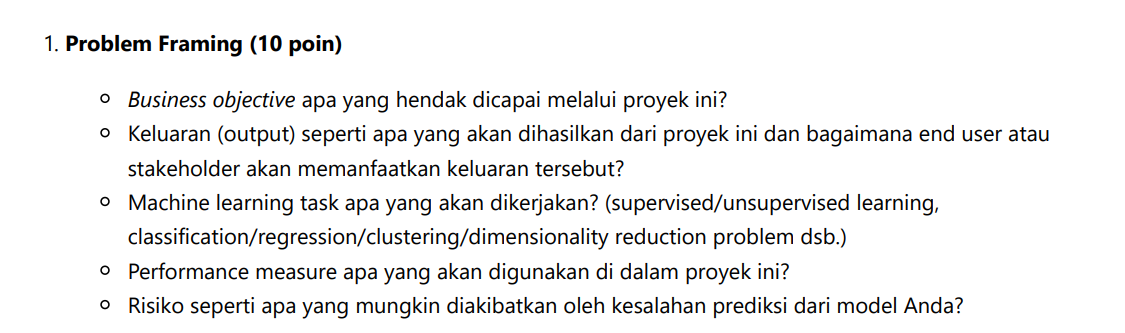



Dapat dipahami bahwa model ini akan memprediksi jadi atau tidaknya penginap untuk menempati kamar yang telah mereka booking sebelumnya namun, di beberapa kejadian, penginap yang sudah membooking kamar mereka malah tidak jadi untuk menempati kamar tersebut sehingga, kamar tersebut kosong dan tidak dapat ditempati oleh calon penginap lainnya yang memang sebenarnya akan menempati kamar tersebut.  
 
*   ***Business objective*** **dari proyek ini adalah memprediksi penginap yang mana yang sebenarnya akan menempati kamar yang telah mereka booking agar, apabila mereka tidak jadi menempati kamar tersebut, dapat disewakan kepada calon penginap lainnya untuk selalu menjaga *occupancy rate* hotel tersebut tinggi dan memaksimalkan profit.**
*   ***Output*** yang diharapkan dari model ini adalah, memprediksi calon penginap yang sudah membooking mana yang akan sebenarnya menempati kamar yang sudah mereka booking dan mana yang tidak akan sebenarnya menempati kamar yang sudah mereka booking
*   ***Machine learning*** ini akan menggunakan supervised learning dengan model classification selanjutnya akan dituning lebih lanjut untuk memaksimalkan precision, recall, f1-score yang didapat dari classification report dan accuracy score
*   ***Performace measure*** yang akan digunakan ialah precision, recall, f1-score yang didapat dari classification report dan accuracy score
*   ***Resiko*** yang timbul apabila salah memprediksi, penginap yang sudah booking dan akan sebenarnya menginap, akan salah kita prediksi sebagai tidak sebenarnya akan menginap (false positive) sehingga menyebabkan mereka sudah datang namun tidak ada kamar untuk menginap atau penginap yang sudah booking namun tidak akan sebenarnya menginap, akan salah kita prediksi sebagai akan sebenarnya menginap (false negative) dan menyebabkan kerugian karena *occupancy rate* yang rendah


#Explanatory Data Analysis (EDA) (20 poin)

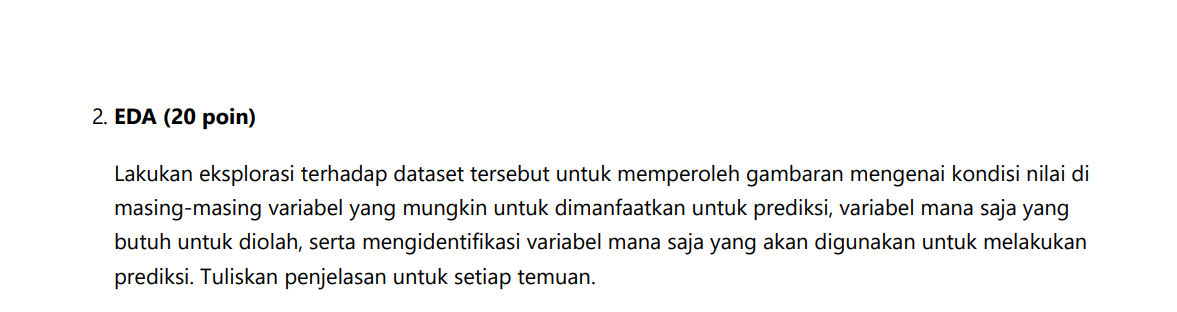

##Import all library and datasets

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.8MB/s 


In [179]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#unsupervised learning library
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete


from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [6]:
df = pd.read_csv('hotel_bookings.csv')

##Check null values and see data types while check is there any outliers in the target

In [7]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [8]:
#from this we know that meal, agent, company have the most null values among others
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# we have multiple objects and numerical (float and integer) in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


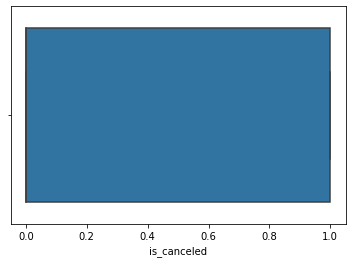

In [11]:
#is_canceled is going to be our y thus, we are going to check if there is an outlier or not and there is none 
sns.boxplot(df['is_canceled'])

##Check the data distribution on target and find new insights

In [17]:
pie_data = df.groupby("is_canceled")["is_repeated_guest"].sum()
pie_data

is_canceled
0    3258
1     552
Name: is_repeated_guest, dtype: int64

([<matplotlib.patches.Wedge at 0x7f01288c75d0>,
 [Text(-0.9880098089410434, 0.48356655946858346, ''),
  Text(0.988009786303658, -0.48356660572066024, '')])

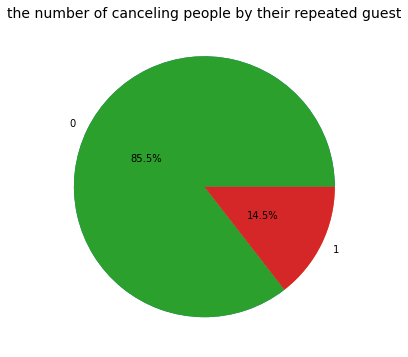

In [21]:
pie, ax = plt.subplots(figsize=[10,6])
labels = pie_data.keys()
plt.pie(x=pie_data, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("the number of canceling people by their repeated guest", fontsize=14);
plt.pie(pie_data)
#Sebanyak lebih dari 80% orang yang tergolong penginap berulang tidak cancel bookingnya dan hanya dibawah 15% yang mengcancel bookingannya 

In [25]:
pie_data = df.groupby("is_canceled")["previous_cancellations"].sum()
pie_data

is_canceled
0    1187
1    9214
Name: previous_cancellations, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0127e7e9d0>,
 [Text(1.0300550222391576, 0.385987889913516, ''),
  Text(-1.0300550222391576, -0.3859878899135161, '')])

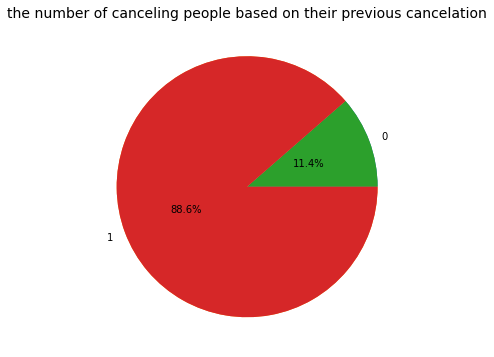

In [27]:
pie, ax = plt.subplots(figsize=[10,6])
labels = pie_data.keys()
plt.pie(x=pie_data, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("the number of canceling people based on their previous cancelation", fontsize=14);
plt.pie(pie_data)
#Lebih dari 80% orang yang sudah mengcancel di masa lalu, mengcancel kembali hanya sekitar 11% yang tidak mengcancel

In [28]:
pie_data = df.groupby("is_canceled")["previous_bookings_not_canceled"].sum()
pie_data

is_canceled
0    15257
1     1111
Name: previous_bookings_not_canceled, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0129085190>,
 [Text(-1.0750854543171768, 0.23279017572833588, ''),
  Text(1.075085459766024, -0.23279015056414457, '')])

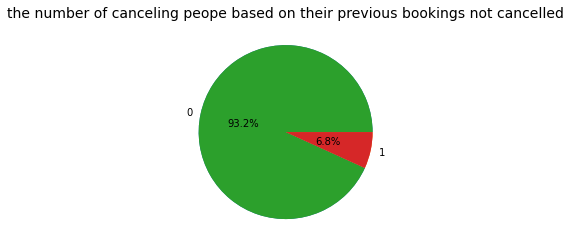

In [30]:
labels = pie_data.keys()
plt.pie(x=pie_data, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("the number of canceling peope based on their previous bookings not cancelled", fontsize=14);
plt.pie(pie_data)
#sebanyak lebih dari 90% orang yang tidak mengcancel bookingannya di masa lalu, tidak mengcancel bookingannya dalam dataset hanya kurang dari 10% yang mengcancel

In [52]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [54]:
pie_data = df.groupby("hotel")["is_canceled"].sum()
pie_data

hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0128b6f410>,
 [Text(-0.7741621628670241, 0.7814556581054687, ''),
  Text(0.7741622360321797, -0.7814555856231726, '')])

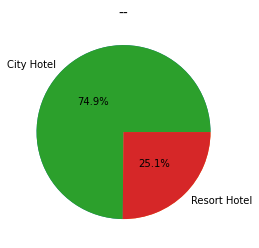

In [55]:
labels = pie_data.keys()
plt.pie(x=pie_data, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("--", fontsize=14);
plt.pie(pie_data)
#Calon penginap city hotel lebih banyak yang mengcancel dibanding resort hotel karena city hotel biasa digunakan untuk bisnis, dimana aktivitas pengunjungnya lebih mudah berubah dan mengharuskan mereka untuk mengcancel.
#Sedangkan resort hotel lebih banyak digunakan untuk berlibur sehingga, aktivitasnya konstan menyebabkan mereka tidak perlu merubah bookingan 

In [66]:
bar_data = df.groupby("arrival_date_month")["is_canceled"].sum()
bar_data.sort_values(ascending=False)
#The most canceled month is August while December, November, January is the least canceled. This might be because it is holiday time  

arrival_date_month
August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: is_canceled, dtype: int64

In [49]:
df['lead_time'].describe().round(2)

count    119390.00
mean        104.01
std         106.86
min           0.00
25%          18.00
50%          69.00
75%         160.00
max         737.00
Name: lead_time, dtype: float64

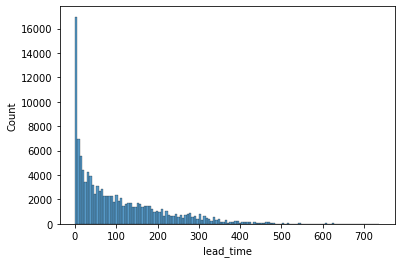

In [51]:
sns.histplot(x= df['lead_time'])

#Data Preparation (20 poin)

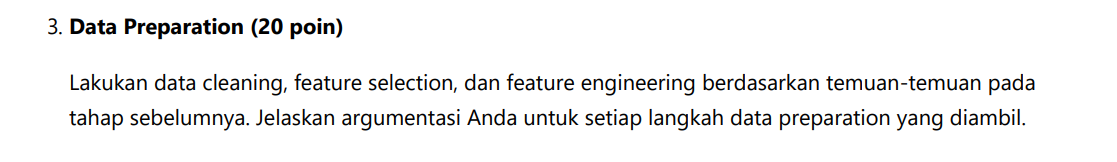

##Determine which targets that are the most relevant

In [75]:
#from this correlation we are going to choose the top 5 HOWEVER, this is not the final since we are going to process the object data as well and combine it with the top 5
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:].round(2)

lead_time                         0.29
total_of_special_requests         0.23
required_car_parking_spaces       0.20
booking_changes                   0.14
previous_cancellations            0.11
is_repeated_guest                 0.08
agent                             0.08
adults                            0.06
previous_bookings_not_canceled    0.06
days_in_waiting_list              0.05
adr                               0.05
babies                            0.03
stays_in_week_nights              0.02
company                           0.02
arrival_date_year                 0.02
arrival_date_week_number          0.01
arrival_date_day_of_month         0.01
children                          0.01
stays_in_weekend_nights           0.00
Name: is_canceled, dtype: float64

In [ ]:
#YANG HARUS MASUK  WALAUPUN OBJECK IALAH DEPOSIT_TYPE, HOTEL, & CUSTOMER_TYPE karena deposito menunjukkan keseriusan calon penginap, hotel hanya ada dua dan keduanya benar benar
# menunjukkan tipe dan intention pengunjung, customer_type menunjukkan tipe tipe customer biasa semaking group semakin jarang untuk cancel

In [69]:
#From this, we are going to drop some features that are not relevant since it has too many isnan and not really matters anyway such as company, children, country
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [82]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [114]:
df_reviewed = df[['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','hotel','deposit_type','customer_type']]

In [115]:
df_reviewed.isnull().sum()

lead_time                      0
total_of_special_requests      0
required_car_parking_spaces    0
booking_changes                0
previous_cancellations         0
hotel                          0
deposit_type                   0
customer_type                  0
dtype: int64

In [116]:
df_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   lead_time                    119390 non-null  int64 
 1   total_of_special_requests    119390 non-null  int64 
 2   required_car_parking_spaces  119390 non-null  int64 
 3   booking_changes              119390 non-null  int64 
 4   previous_cancellations       119390 non-null  int64 
 5   hotel                        119390 non-null  object
 6   deposit_type                 119390 non-null  object
 7   customer_type                119390 non-null  object
dtypes: int64(5), object(3)
memory usage: 7.3+ MB


In [93]:
df['hotel'].unique() # ini menggunakan binary  karena hanya ada dua tipe

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [94]:
df['deposit_type'].unique() #ini menggunakan ordinal karena berupa jenjang

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [95]:
df['customer_type'].unique() # ini menggunakan ordinal karena berupa jenjang

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
#semua numerical di standard scaler + one hot

## One hot encoding and Standard Scaler

In [124]:
df_onehot = pd.get_dummies(df_reviewed[['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations']])

In [134]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_onehot)
df_onehot_scaled = pd.DataFrame(scaled,columns=['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations'])

##Binary Encoding

In [118]:
binary_encoder = ce.BinaryEncoder()
df_binary = binary_encoder.fit_transform(df_reviewed['hotel'])
df_binary

,hotel_0,hotel_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
119385,1,0
119386,1,0
119387,1,0
119388,1,0


##Ordinal Encoding

In [119]:
df['customer_type'].unique() # ini menggunakan ordinal

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [120]:
ordinal_mapping = [{'col':'customer_type','mapping':{None:0,'Transient':1,'Contract':2,'Transient-Party':3,
                                                 'Group':4,}}]

In [121]:
ordinal_encoder = ce.OrdinalEncoder(cols='education',mapping=ordinal_mapping)

In [122]:
df_ordinal = ordinal_encoder.fit_transform(df_reviewed['customer_type'])

In [123]:
df_ordinal

,customer_type
0,1
1,1
2,1
3,1
4,1
...,...
119385,1
119386,1
119387,1
119388,1


##Concat everything

In [140]:
df_reviewed_concat = pd.concat([df['is_canceled'],df_onehot_scaled,df_binary,df_ordinal],axis=1)

In [141]:
df_reviewed_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_canceled                  119390 non-null  int64  
 1   lead_time                    119390 non-null  float64
 2   total_of_special_requests    119390 non-null  float64
 3   required_car_parking_spaces  119390 non-null  float64
 4   booking_changes              119390 non-null  float64
 5   previous_cancellations       119390 non-null  float64
 6   hotel_0                      119390 non-null  int64  
 7   hotel_1                      119390 non-null  int64  
 8   customer_type                119390 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 8.2 MB


#Model Training (25 poin)

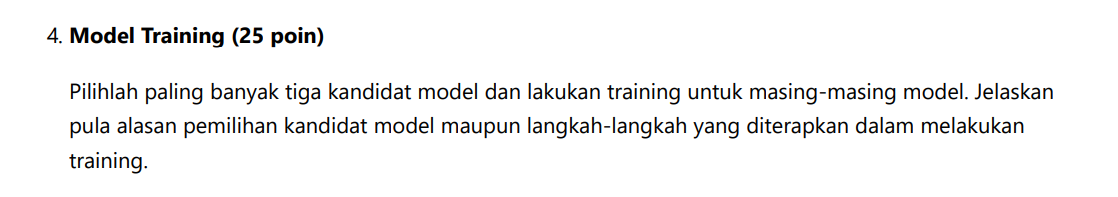

##Tentukan X dan y serta  train test split

In [142]:
X = df_reviewed_concat.drop('is_canceled',axis=1)
y = df_reviewed_concat['is_canceled']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

##Bikin classifier

In [ ]:
#Classifier ini dipilih karena tipe data yang dicari merupakan tipe data classification 
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5)
logreg = LogisticRegression(max_iter=1000)

##Try to predict

In [158]:
#kkn
knn = knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
print("Accuracy KNN:",metrics.accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test,knn_y_pred))

Accuracy KNN: 0.7634363570371612
              precision    recall  f1-score   support

           0       0.79      0.84      0.82     22496
           1       0.70      0.63      0.66     13321

    accuracy                           0.76     35817
   macro avg       0.75      0.74      0.74     35817
weighted avg       0.76      0.76      0.76     35817



In [159]:
#tree
dt.fit(X_train,y_train)
tree_y_pred = dt.predict(X_test)
print("Accuracy tree:",metrics.accuracy_score(y_test, tree_y_pred))
print(classification_report(y_test,tree_y_pred))

Accuracy tree: 0.7686573414858866
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     22496
           1       0.73      0.61      0.66     13321

    accuracy                           0.77     35817
   macro avg       0.76      0.74      0.74     35817
weighted avg       0.76      0.77      0.76     35817



In [160]:
#logreg
logreg = logreg.fit(X_train,y_train)
logreg_y_pred = logreg.predict(X_test)
print("Accuracy logreg:",metrics.accuracy_score(y_test, logreg_y_pred))
print(classification_report(y_test,logreg_y_pred))

Accuracy logreg: 0.7619286930787056
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     22496
           1       0.75      0.55      0.63     13321

    accuracy                           0.76     35817
   macro avg       0.76      0.72      0.73     35817
weighted avg       0.76      0.76      0.75     35817



#try with VotingClassifier or Ensemble, check the classification report, and find the cross val mean

In [151]:
#dicoba juga menggunakan votingclassifier untuk melihat accuracy score apabila ketiganya digabung 
vc = VotingClassifier([('clf1',knn),('clf2',dt),('clf3',logreg)],voting='soft')

In [152]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('clf1',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('clf2',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_dec

In [153]:
vc_y_pred =  vc.predict(X_test)

In [157]:
print("Accuracy ensemble:",metrics.accuracy_score(y_test, vc_y_pred))
print(classification_report(y_test,vc_y_pred))

Accuracy ensemble: 0.7791830694921406
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     22496
           1       0.75      0.60      0.67     13321

    accuracy                           0.78     35817
   macro avg       0.77      0.74      0.75     35817
weighted avg       0.78      0.78      0.77     35817



# Evaluation, Model Selection, and Model Tuning (15 poin)

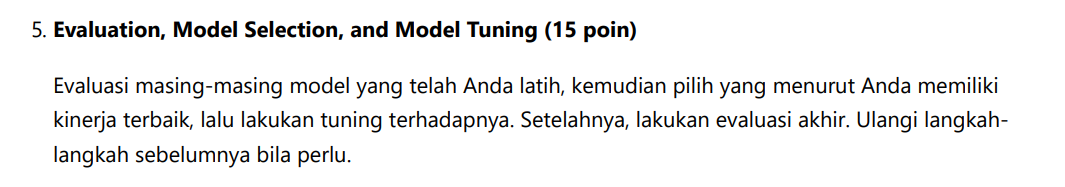

In [173]:
dt = DecisionTreeClassifier()

In [ ]:
# berdasarkan hasil training, model dengan prediksi paling baik ialah Decision tree
# Sehingga kita disini akan tuning tree lalu membandingkan hasilnya dengan yang diensemble

In [174]:
param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,15),
    'min_samples_split':range(1,15),
    'min_samples_leaf':range(1,5)
}

In [182]:
#Menggunakan randomizedsearch dan bukan gridsearch karena banyaknya data, fitur, serta keterbatasan waktu. Gridsearch memakanwaktu yang sangat lama 
rand = RandomizedSearchCV(dt,param_distributions=param_dict,cv=10,scoring='accuracy')

In [183]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [184]:
rand.fit(X_train_val,y_train_val)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [186]:
rand_y_pred = rand.predict(X_test)

In [188]:
print("Accuracy Tree Best Param:",metrics.accuracy_score(y_test, rand_y_pred))

Accuracy Tree Best Param: 0.7800764999860401


In [190]:
print(classification_report(y_test,rand_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     22496
           1       0.76      0.60      0.67     13321

    accuracy                           0.78     35817
   macro avg       0.77      0.74      0.75     35817
weighted avg       0.78      0.78      0.77     35817



In [191]:
rand.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 11}

In [192]:
rand.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
rand.best_estimator_.fit(X_train_val,y_train_val)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [198]:
rand.best_score_

0.7818912937651901

In [195]:
rand_y_pred2 = rand.best_estimator_.predict(X_test)

In [196]:
print("Accuracy Tree Best Param:",metrics.accuracy_score(y_test, rand_y_pred2))

Accuracy Tree Best Param: 0.7801044196889745


In [197]:
print(classification_report(y_test,rand_y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     22496
           1       0.76      0.60      0.67     13321

    accuracy                           0.78     35817
   macro avg       0.77      0.74      0.75     35817
weighted avg       0.78      0.78      0.77     35817



# Result, Conclusion, and Recommendation (10 poin)

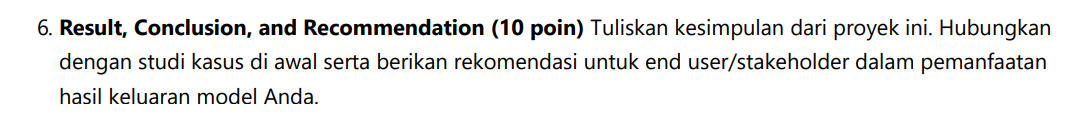



1.   Setelah mencoba 3 model yaitu KNN, DecisionTree dan LogReg didapati bahwa tree memiliki accuracy dan f1 score yang paling tinggi namun, setelah dilakukan ensemble menggunakan voting classifier, didapati bahwa ensemble memiliki accuracy yang lebih tinggi 
2.   Namun setelah individual classifier yaitu tree dituning lebih lanjut menggunakan RandomizedSearch didapati bahwa accuracy tree yang sudah dituning lebih tinggi ketimbang ensemble yang belum dituning. 
3. Model terakhir menunjukkan bahwa model tersebut dapat memprediksi secara akurat sebesar 78% dari calon penginap yang akan cancel atau tidak
4. Akurasi tersebut didapat menggunakan 8 dari 32 kolom yang digunakan dimana 3 diantaranya merupakan object yang memerlukan preprocess lebih lanjut 

**REKOMENDASI**
1. Lebih berhati hati pada cityhotel karena kecenderungan untuk cancel lebih tinggi
2. Lebih mengawasi calon penginap yang tidak memiliki deposito karena cenderung lebih mudah untuk cancel
3. Group biasanya lebih sedikit untuk mengcancel sehingga tidak usah terlalu khawatir
4. Berhati-hati pada calon penginap yang pernah mengcancel sebelumnya, mereka diprediksi akan mengulang tindakannya
5. Gunakan lebih banyak fitur apabila untuk meningkat accuracy apabila memiliki waktu lebih


